Rishabh - https://www.linkedin.com/in/rishabh-kuletha-195375179/

Description source - https://www.kaggle.com/jessicali9530/honey-production

.csv file Data source - https://github.com/TarHeel45

<img src="https://cdn.pixabay.com/photo/2017/07/26/20/00/honey-2542952_1280.jpg">
image by - https://pixabay.com/users/explorerbob-3093227/


## Deploying Linear regression model to predict honey production in year 2050

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#importing dataset

df = pd.read_csv("https://raw.githubusercontent.com/TarHeel45/Honey-Production-Dashboard/master/Data/HoneyProduction9816.csv")

In [3]:
# How dataset looks?

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
# focussing on "year" vs "totalprod" , grouping various state wise production into mean of single year.

prod_per_year = df.groupby("year").totalprod.mean().reset_index()

prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [5]:
# creating a variable for "year" and storing it as X
# reshaping X for further implementation of model

X = prod_per_year["year"]
X = X.values.reshape(-1,1)

In [6]:
# creating another variable for "totalprod"

y = prod_per_year["totalprod"]


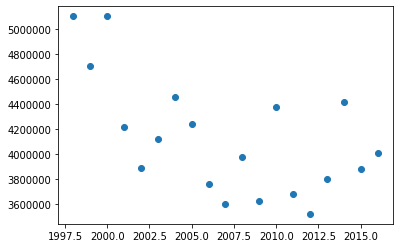

In [7]:
# plotting a scatterplot

plt.scatter(X, y)
plt.show()

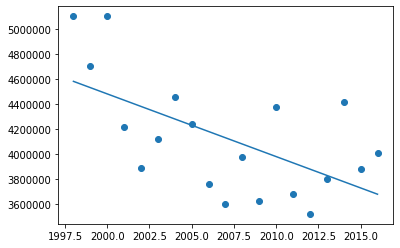

In [8]:
# The above graph shows a declining trend of honey bee production.
# we will now find a "line of fit", which will reflect downward slope with least loss

# extracting year and total prod from the groupby we used before:

X = prod_per_year["year"]
X = X.values.reshape(-1,1)

y = prod_per_year["totalprod"]

#deploying our model
line = linear_model.LinearRegression()
line.fit(X, y)
y_predict = line.predict(X)

# plotting line upon the scatter plot
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()

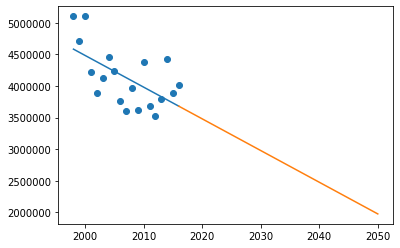

In [9]:
# Yay! we Found "best fit line", thanks to scipy!

# Now we want to predict the production of honey bee in 2050

# creating new array from 2016 to 2050
X_future = np.array(range(2016, 2051))
X_future = X_future.reshape(-1, 1)

# predicting y values using .predict 
future_predict = line.predict(X_future)

# plotting along the previous 
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show()

## In year 2050, honey production will fall and will be < 1mn pounds.